<a href="https://colab.research.google.com/github/lxxhxng/aipython/blob/main/13_%EA%B8%B0%EC%88%99%EC%82%AC%EC%88%98%EC%9A%A9%ED%98%84%ED%99%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
plt.rc('font', family='NanumGothic')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/겨울계절_데이터분석입문/기숙사수용현황_2022.xlsx')
df

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도
0,2022,대학교,사립,경남,기존,가야대학교(김해),1869,88,642,15,직영(구내),여자 기숙사,2009
1,2022,대학교,사립,경남,기존,가야대학교(김해),1869,80,642,6,직영(구내),군자관,2003
2,2022,대학교,사립,경기,기존,가천대학교,20650,98,3087,18,직영(구외),의과대학 기숙사,2019
3,2022,대학교,사립,경기,기존,가천대학교,20650,40,3087,8,직영(구외),송도BRC학생생활관,2013
4,2022,대학교,사립,경기,기존,가천대학교,20650,184,3087,0,직영(구내),제1학생생활관,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,2022,대학교,사립,서울,기존,홍익대학교,14022,551,1845,1773,직영(구내),제2기숙사,2016
1146,2022,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,5491,94,1370,304,직영(구내),두루암학사,1991
1147,2022,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,5491,307,1370,745,직영(구내),새로암학사,2002
1148,2022,대학교,사립,경기,기존,화성의과학대학교,374,10,104,0,직영(구내),본관동,2005


In [ ]:
# 열명 확인
df.columns

Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '재학생수', '총실수', '수용가능인원',
       '지원자수', '구분', '건물명', '준공연도'],
      dtype='object')

In [ ]:
# 학교종류가 대학교이고 설립구분이 사립, 국립인 경우
# 조건문
df = df[(df['학교종류'] == '대학교') & (df['설립구분'].isin(['사립', '국립']))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 0 to 1149
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준연도    1063 non-null   int64 
 1   학교종류    1063 non-null   object
 2   설립구분    1063 non-null   object
 3   지역      1063 non-null   object
 4   상태      1063 non-null   object
 5   학교      1063 non-null   object
 6   재학생수    1063 non-null   int64 
 7   총실수     1063 non-null   int64 
 8   수용가능인원  1063 non-null   int64 
 9   지원자수    1063 non-null   int64 
 10  구분      1061 non-null   object
 11  건물명     1061 non-null   object
 12  준공연도    1063 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 116.3+ KB


In [ ]:
# 학교종류가 대학교이고 설립구분이 사립, 국립인 경우
# Query
df = df.query('(학교종류 == "대학교") and (설립구분) in ["사립", "국립"]')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 0 to 1149
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준연도    1063 non-null   int64 
 1   학교종류    1063 non-null   object
 2   설립구분    1063 non-null   object
 3   지역      1063 non-null   object
 4   상태      1063 non-null   object
 5   학교      1063 non-null   object
 6   재학생수    1063 non-null   int64 
 7   총실수     1063 non-null   int64 
 8   수용가능인원  1063 non-null   int64 
 9   지원자수    1063 non-null   int64 
 10  구분      1061 non-null   object
 11  건물명     1061 non-null   object
 12  준공연도    1063 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 116.3+ KB


In [ ]:
# 기숙사 수용률 구하기 : 수용가능인원 / 재학생수 * 100
df['수용률'] = df['수용가능인원'] / df['재학생수'] * 100
df.head()

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률
0,2022,대학교,사립,경남,기존,가야대학교(김해),1869,88,642,15,직영(구내),여자 기숙사,2009,34.349920
1,2022,대학교,사립,경남,기존,가야대학교(김해),1869,80,642,6,직영(구내),군자관,2003,34.349920
2,2022,대학교,사립,경기,기존,가천대학교,20650,98,3087,18,직영(구외),의과대학 기숙사,2019,14.949153
3,2022,대학교,사립,경기,기존,가천대학교,20650,40,3087,8,직영(구외),송도BRC학생생활관,2013,14.949153
4,2022,대학교,사립,경기,기존,가천대학교,20650,184,3087,0,직영(구내),제1학생생활관,2007,14.949153


In [ ]:
# 기숙사 수용률 구하기 : 수용가능인원 / 재학생수 * 100 : 소수 2째자리까지 표시
df['수용률'] = np.round(df['수용가능인원'] / df['재학생수'] * 100, 2)
df.head()

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률
0,2022,대학교,사립,경남,기존,가야대학교(김해),1869,88,642,15,직영(구내),여자 기숙사,2009,34.35
1,2022,대학교,사립,경남,기존,가야대학교(김해),1869,80,642,6,직영(구내),군자관,2003,34.35
2,2022,대학교,사립,경기,기존,가천대학교,20650,98,3087,18,직영(구외),의과대학 기숙사,2019,14.95
3,2022,대학교,사립,경기,기존,가천대학교,20650,40,3087,8,직영(구외),송도BRC학생생활관,2013,14.95
4,2022,대학교,사립,경기,기존,가천대학교,20650,184,3087,0,직영(구내),제1학생생활관,2007,14.95


In [ ]:
# 입사경쟁률 : 지원자수 / 수용가능인원 * 100 : 소수 2째자리까지 표시
df['입사경쟁률'] = np.round(df['지원자수'] / df['수용가능인원'] * 100, 2)
df.head()

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률,입사경쟁률
0,2022,대학교,사립,경남,기존,가야대학교(김해),1869,88,642,15,직영(구내),여자 기숙사,2009,34.35,2.34
1,2022,대학교,사립,경남,기존,가야대학교(김해),1869,80,642,6,직영(구내),군자관,2003,34.35,0.93
2,2022,대학교,사립,경기,기존,가천대학교,20650,98,3087,18,직영(구외),의과대학 기숙사,2019,14.95,0.58
3,2022,대학교,사립,경기,기존,가천대학교,20650,40,3087,8,직영(구외),송도BRC학생생활관,2013,14.95,0.26
4,2022,대학교,사립,경기,기존,가천대학교,20650,184,3087,0,직영(구내),제1학생생활관,2007,14.95,0.00


In [ ]:
# 준공연수 구하기 : 기준연도 - 준공연도
df['준공연수'] = df['기준연도'] - df['준공연도']
df.head()

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률,입사경쟁률,준공연수
0,2022,대학교,사립,경남,기존,가야대학교(김해),1869,88,642,15,직영(구내),여자 기숙사,2009,34.35,2.34,13
1,2022,대학교,사립,경남,기존,가야대학교(김해),1869,80,642,6,직영(구내),군자관,2003,34.35,0.93,19
2,2022,대학교,사립,경기,기존,가천대학교,20650,98,3087,18,직영(구외),의과대학 기숙사,2019,14.95,0.58,3
3,2022,대학교,사립,경기,기존,가천대학교,20650,40,3087,8,직영(구외),송도BRC학생생활관,2013,14.95,0.26,9
4,2022,대학교,사립,경기,기존,가천대학교,20650,184,3087,0,직영(구내),제1학생생활관,2007,14.95,0.00,15


In [ ]:
# null 결측치 개수 확인
df.isnull().sum()

기준연도      0
학교종류      0
설립구분      0
지역        0
상태        0
학교        0
재학생수      0
총실수       0
수용가능인원    0
지원자수      0
구분        2
건물명       2
준공연도      0
수용률       0
입사경쟁률     2
준공연수      0
dtype: int64

In [ ]:
# null 결측치 개수 확인 : true(1), false(0), axis로 어느행에 결측치가 존재하는지 확인
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1145    0
1146    0
1147    0
1148    0
1149    0
Length: 1063, dtype: int64

In [ ]:
# 최종 Null 확인
df[df['구분'].isnull()]

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률,입사경쟁률,준공연수
63,2022,대학교,사립,서울,기존,경기대학교 _제2캠퍼스,2595,0,0,0,NaN,NaN,0,0.0,NaN,2022
729,2022,대학교,사립,전북,기존,예원예술대학교,1062,0,0,0,NaN,NaN,0,0.0,NaN,2022


In [ ]:
# NaN 데이터 삭제
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 0 to 1149
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준연도    1061 non-null   int64  
 1   학교종류    1061 non-null   object 
 2   설립구분    1061 non-null   object 
 3   지역      1061 non-null   object 
 4   상태      1061 non-null   object 
 5   학교      1061 non-null   object 
 6   재학생수    1061 non-null   int64  
 7   총실수     1061 non-null   int64  
 8   수용가능인원  1061 non-null   int64  
 9   지원자수    1061 non-null   int64  
 10  구분      1061 non-null   object 
 11  건물명     1061 non-null   object 
 12  준공연도    1061 non-null   int64  
 13  수용률     1061 non-null   float64
 14  입사경쟁률   1061 non-null   float64
 15  준공연수    1061 non-null   int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 140.9+ KB


In [ ]:
# 최종 Null 반영여부 확인
df[df['구분'].isnull()]

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률,입사경쟁률,준공연수


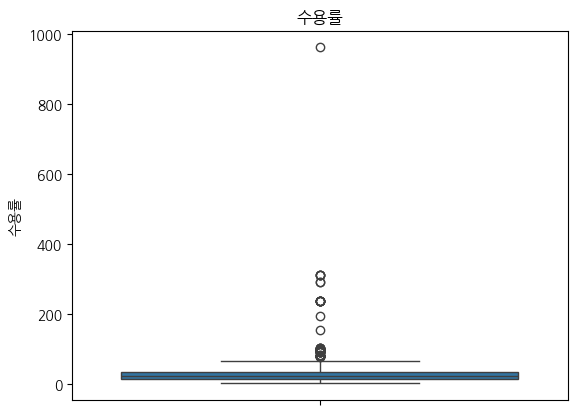

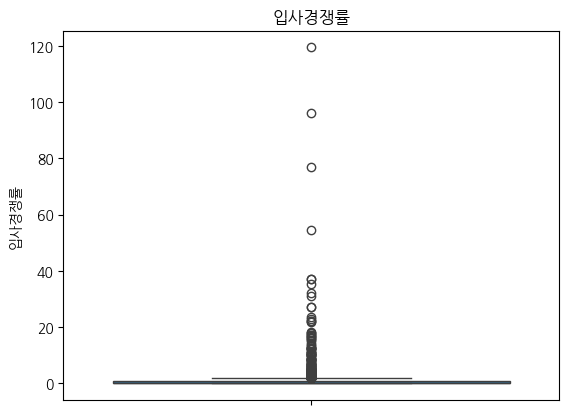

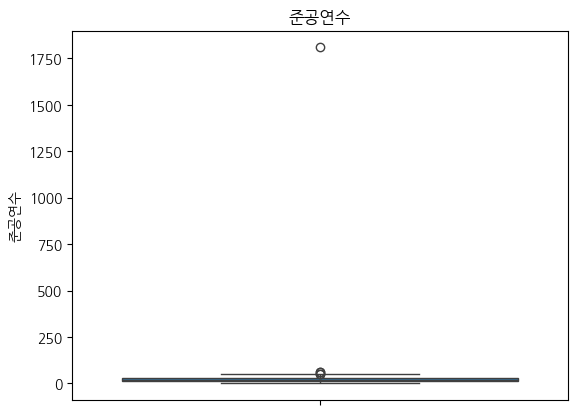

In [ ]:
# 수치 데이터 박스플롯 : error 메세지 확인 후 수정하여 완성하라
col = ['수용률', '입사경쟁률', '준공연수']
for c in col:
    sns.boxplot(data = df[c])
    plt.title(c)
    plt.show()

In [ ]:
# 수용률에 대한 요약 정보 확인
df['수용률'].describe()

count    1061.000000
mean       32.856607
std        44.607242
min         1.950000
25%        14.100000
50%        23.340000
75%        34.900000
max       961.110000
Name: 수용률, dtype: float64

In [ ]:
# 수용률이 900 이상인 데이터 확인 (이상치 확인)
df[df['수용률'] > 900]

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률,입사경쟁률,준공연수
346,2022,대학교,사립,세종,기존,대전가톨릭대학교,54,186,519,1,직영(구내),비배섬관,1995,961.11,0.19,27


In [ ]:
# 수용률이 100 이하인 학교만 사용 (데이터 안정화, 100이하 값 제거)
df = df[df['수용률'] < 100]
df

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률,입사경쟁률,준공연수
0,2022,대학교,사립,경남,기존,가야대학교(김해),1869,88,642,15,직영(구내),여자 기숙사,2009,34.35,2.34,13
1,2022,대학교,사립,경남,기존,가야대학교(김해),1869,80,642,6,직영(구내),군자관,2003,34.35,0.93,19
2,2022,대학교,사립,경기,기존,가천대학교,20650,98,3087,18,직영(구외),의과대학 기숙사,2019,14.95,0.58,3
3,2022,대학교,사립,경기,기존,가천대학교,20650,40,3087,8,직영(구외),송도BRC학생생활관,2013,14.95,0.26,9
4,2022,대학교,사립,경기,기존,가천대학교,20650,184,3087,0,직영(구내),제1학생생활관,2007,14.95,0.00,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,2022,대학교,사립,서울,기존,홍익대학교,14022,551,1845,1773,직영(구내),제2기숙사,2016,13.16,96.10,6
1146,2022,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,5491,94,1370,304,직영(구내),두루암학사,1991,24.95,22.19,31
1147,2022,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,5491,307,1370,745,직영(구내),새로암학사,2002,24.95,54.38,20
1148,2022,대학교,사립,경기,기존,화성의과학대학교,374,10,104,0,직영(구내),본관동,2005,27.81,0.00,17


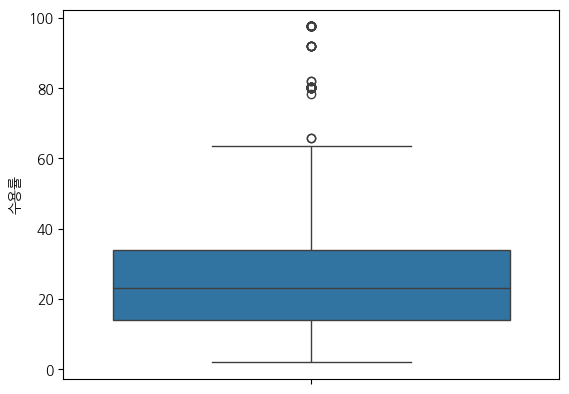

In [ ]:
# 상자그림 그리기
sns.boxplot(data = df['수용률'])
plt.show()

In [ ]:
# 입사경쟁률이 1 초과 학교
df[df['입사경쟁률'] > 1]

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률,입사경쟁률,준공연수
0,2022,대학교,사립,경남,기존,가야대학교(김해),1869,88,642,15,직영(구내),여자 기숙사,2009,34.35,2.34,13
16,2022,대학교,사립,충북,기존,가톨릭꽃동네대학교,401,52,182,8,임차,마리아의 집,2001,45.39,4.40,21
17,2022,대학교,사립,충북,기존,가톨릭꽃동네대학교,401,39,182,10,직영(구내),요셉의 집,2010,45.39,5.49,12
41,2022,대학교,국립,강원,기존,강원대학교 _제2캠퍼스,5565,320,2620,269,임차,가온관,2016,47.08,10.27,6
43,2022,대학교,국립,강원,기존,강원대학교 _제2캠퍼스,5565,124,2620,356,직영(구외),도원관,2009,47.08,13.59,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,2022,대학교,사립,서울,기존,홍익대학교,14022,69,1845,122,직영(구내),기숙사(남자),1988,13.16,6.61,34
1144,2022,대학교,사립,서울,기존,홍익대학교,14022,36,1845,51,직영(구내),기숙사(여자),1988,13.16,2.76,34
1145,2022,대학교,사립,서울,기존,홍익대학교,14022,551,1845,1773,직영(구내),제2기숙사,2016,13.16,96.10,6
1146,2022,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,5491,94,1370,304,직영(구내),두루암학사,1991,24.95,22.19,31


In [ ]:
# 준공연수 이상치 데이터 확인
df[df['준공연수'] >= 100]

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률,입사경쟁률,준공연수
84,2022,대학교,국립,대구,기존,경북대학교,24779,212,5936,103,민자(BTL),명의관,212,23.96,1.74,1810


In [ ]:
# 준공연도가 2012 인데 212 로 되어있음
df.loc[84, '준공연도'] = 2012

In [ ]:
# 준공연수 재 계산
df['준공연수'] = df['기준연도'] - df['준공연도']

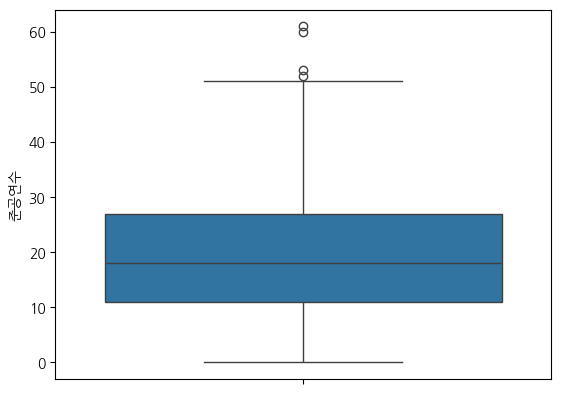

In [ ]:
# 상자그림 그리기
sns.boxplot(data = df['준공연수'])
plt.show()

In [ ]:
# 기준연도와 준공연도 category 형식의 범주형 자료로 변경
df['기준연도'] = df['기준연도'].astype('category')
df['준공연도'] = df['준공연도'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1149
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   기준연도    1040 non-null   category
 1   학교종류    1040 non-null   object  
 2   설립구분    1040 non-null   object  
 3   지역      1040 non-null   object  
 4   상태      1040 non-null   object  
 5   학교      1040 non-null   object  
 6   재학생수    1040 non-null   int64   
 7   총실수     1040 non-null   int64   
 8   수용가능인원  1040 non-null   int64   
 9   지원자수    1040 non-null   int64   
 10  구분      1040 non-null   object  
 11  건물명     1040 non-null   object  
 12  준공연도    1040 non-null   category
 13  수용률     1040 non-null   float64 
 14  입사경쟁률   1040 non-null   float64 
 15  준공연수    1040 non-null   int64   
dtypes: category(2), float64(2), int64(5), object(7)
memory usage: 158.8+ KB


In [ ]:
# 상관관계계수 구하기
df.corr()

<ipython-input-39-cceab03b4860>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,재학생수,총실수,수용가능인원,지원자수,수용률,입사경쟁률,준공연수
재학생수,1.000000,0.227336,0.733932,0.052193,-0.385501,-0.081152,-0.050548
총실수,0.227336,1.000000,0.303365,0.288581,0.016972,0.127340,-0.251463
수용가능인원,0.733932,0.303365,1.000000,0.022747,0.189966,-0.114586,0.018156
지원자수,0.052193,0.288581,0.022747,1.000000,-0.052407,0.851962,-0.117531
수용률,-0.385501,0.016972,0.189966,-0.052407,1.000000,-0.049724,0.139440
입사경쟁률,-0.081152,0.127340,-0.114586,0.851962,-0.049724,1.000000,-0.077778
준공연수,-0.050548,-0.251463,0.018156,-0.117531,0.139440,-0.077778,1.000000


<ipython-input-42-1f94d8fdffe9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True) # 수치값 표현
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


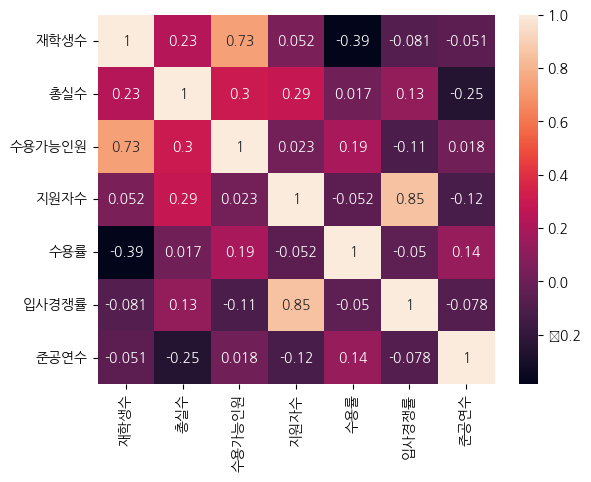

In [ ]:
sns.heatmap(df.corr(), annot=True) # 수치값 표현
plt.show()

In [ ]:
df.head(10) # 동일 대학 내 여러 기숙사 존재, 그룹핑

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률,입사경쟁률,준공연수
0,2022,대학교,사립,경남,기존,가야대학교(김해),1869,88,642,15,직영(구내),여자 기숙사,2009,34.35,2.34,13
1,2022,대학교,사립,경남,기존,가야대학교(김해),1869,80,642,6,직영(구내),군자관,2003,34.35,0.93,19
2,2022,대학교,사립,경기,기존,가천대학교,20650,98,3087,18,직영(구외),의과대학 기숙사,2019,14.95,0.58,3
3,2022,대학교,사립,경기,기존,가천대학교,20650,40,3087,8,직영(구외),송도BRC학생생활관,2013,14.95,0.26,9
4,2022,대학교,사립,경기,기존,가천대학교,20650,184,3087,0,직영(구내),제1학생생활관,2007,14.95,0.00,15
5,2022,대학교,사립,경기,기존,가천대학교,20650,244,3087,0,직영(구내),제3학생생활관,2022,14.95,0.00,0
6,2022,대학교,사립,경기,기존,가천대학교,20650,393,3087,0,직영(구내),제2학생생활관,2017,14.95,0.00,5
7,2022,대학교,사립,경기,기존,가천대학교,20650,44,3087,0,직영(구내),강화기숙사,1998,14.95,0.00,24
8,2022,대학교,사립,경기,기존,가천대학교,20650,140,3087,5,직영(구내),보건과학대학학생생활관,2015,14.95,0.16,7
9,2022,대학교,사립,강원,기존,가톨릭관동대학교,6947,221,2955,0,직영(구내),제5생활관,2004,42.54,0.00,18


In [ ]:
# 학교, 설립구분, 지역별 그룹 : key로 반영됨
dfg = df.groupby(['학교', '설립구분', '지역']).mean()
dfg

<ipython-input-44-ff1efcf989c2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfg = df.groupby(['학교', '설립구분', '지역']).mean()


,,,재학생수,총실수,수용가능인원,지원자수,수용률,입사경쟁률,준공연수
학교,설립구분,지역,,,,,,,
가야대학교(김해),사립,경남,1869.0,84.000000,642.0,10.500000,34.35,1.635000,16.000000
가천대학교,사립,경기,20650.0,163.285714,3087.0,4.428571,14.95,0.142857,9.000000
가톨릭관동대학교,사립,강원,6947.0,109.000000,2955.0,0.000000,42.54,0.000000,24.285714
가톨릭꽃동네대학교,사립,충북,401.0,45.500000,182.0,9.000000,45.39,4.945000,16.500000
가톨릭대학교,사립,경기,7430.0,218.500000,1242.0,1.000000,16.72,0.080000,8.500000
...,...,...,...,...,...,...,...,...,...
호남신학대학교,사립,광주,791.0,129.000000,284.0,105.000000,35.90,36.970000,12.000000
호서대학교,사립,충남,12897.0,246.000000,3537.0,16.200000,27.42,0.458000,7.200000
홍익대학교,사립,서울,14022.0,116.714286,1845.0,340.571429,13.16,18.458571,22.142857


In [ ]:
# 학교, 설립구분, 지역별 그룹 : key를 열값으로 전환
dfg = df.groupby(['학교', '설립구분', '지역']).mean()
dfg = dfg.reset_index()
dfg

<ipython-input-45-b43e336b2699>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfg = df.groupby(['학교', '설립구분', '지역']).mean()


,학교,설립구분,지역,재학생수,총실수,수용가능인원,지원자수,수용률,입사경쟁률,준공연수
0,가야대학교(김해),사립,경남,1869.0,84.000000,642.0,10.500000,34.35,1.635000,16.000000
1,가천대학교,사립,경기,20650.0,163.285714,3087.0,4.428571,14.95,0.142857,9.000000
2,가톨릭관동대학교,사립,강원,6947.0,109.000000,2955.0,0.000000,42.54,0.000000,24.285714
3,가톨릭꽃동네대학교,사립,충북,401.0,45.500000,182.0,9.000000,45.39,4.945000,16.500000
4,가톨릭대학교,사립,경기,7430.0,218.500000,1242.0,1.000000,16.72,0.080000,8.500000
...,...,...,...,...,...,...,...,...,...,...
187,호남신학대학교,사립,광주,791.0,129.000000,284.0,105.000000,35.90,36.970000,12.000000
188,호서대학교,사립,충남,12897.0,246.000000,3537.0,16.200000,27.42,0.458000,7.200000
189,홍익대학교,사립,서울,14022.0,116.714286,1845.0,340.571429,13.16,18.458571,22.142857
190,홍익대학교 _제2캠퍼스,사립,세종,5491.0,200.500000,1370.0,524.500000,24.95,38.285000,25.500000


<ipython-input-46-fc0e8d36ec28>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True) # 수치값 표현?
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


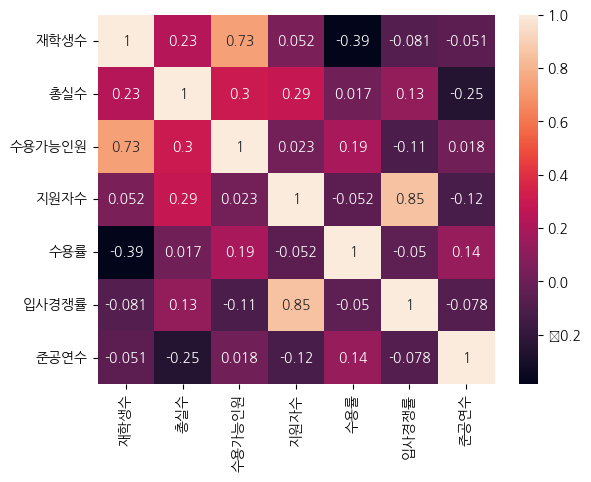

In [ ]:
# 학교별 평균 반영된 corr
sns.heatmap(df.corr(), annot=True) # 수치값 표현

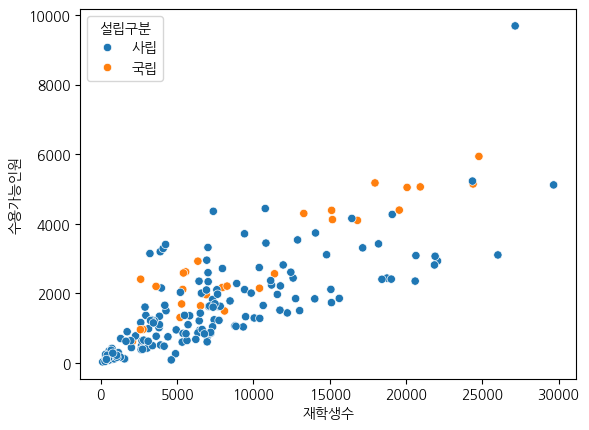

In [ ]:
# 재학생수와 수용가능인원 관계
sns.scatterplot(x='재학생수', y='수용가능인원', hue='설립구분', data=dfg)
plt.show()

In [ ]:
# 준공연수 재분류
dfg['준공구분'] = np.where(dfg['준공연수'] <= 10, '10년이하',
                        np.where(dfg['준공연수'] <= 20, '11~20년이하',
                       '20년초과'))
dfg['준공구분'].unique()

array(['11~20년이하', '10년이하', '20년초과'], dtype=object)

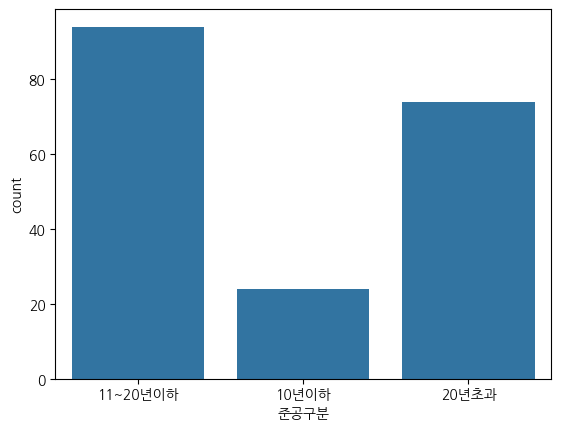

In [ ]:
sns.countplot(x='준공구분', data=dfg) # 순서 임의 지정
plt.show()

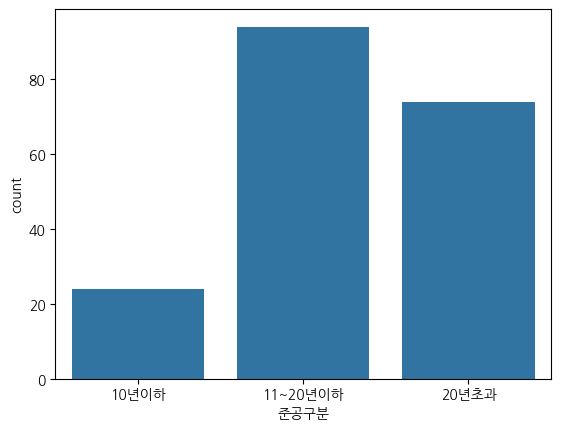

In [ ]:
# 10년이하 / 11~20 / 20년초과 순서 지정
sns.countplot(x='준공구분', order=['10년이하', '11~20년이하', '20년초과'], data=dfg)
plt.show()

In [ ]:
dfg.columns

Index(['학교', '설립구분', '지역', '재학생수', '총실수', '수용가능인원', '지원자수', '수용률', '입사경쟁률',
       '준공연수', '준공구분'],
      dtype='object')

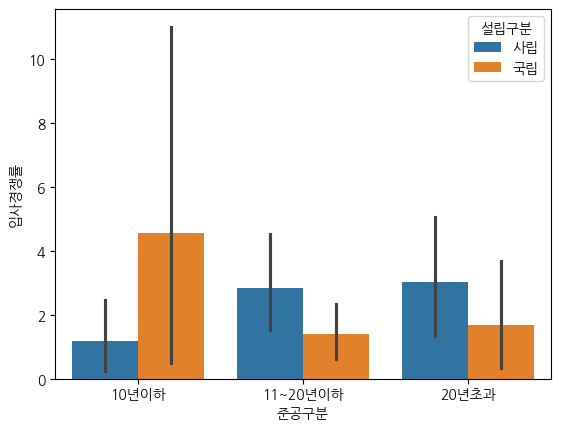

In [ ]:
# 입사경쟁률
sns.barplot(x='준공구분', y='입사경쟁률', hue='설립구분', order=['10년이하', '11~20년이하', '20년초과'], data=dfg)
plt.show()

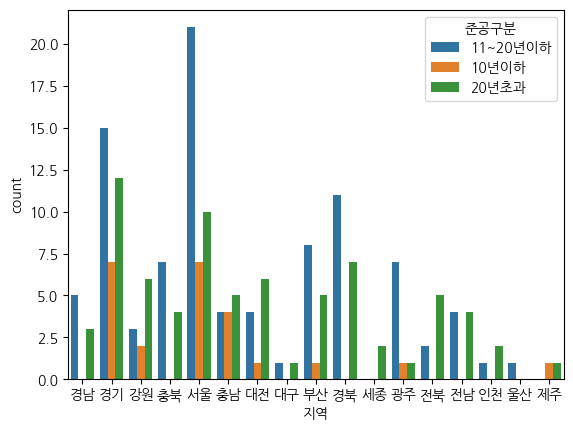

In [ ]:
# 지역별, 준공구분
sns.countplot(x='지역', hue='준공구분', data=dfg)
plt.show()

In [ ]:
이홍근이_하고싶은_말 = '박소홍 사랑해'

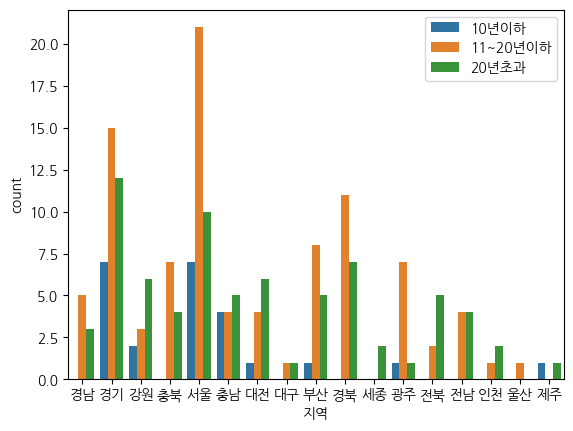

In [ ]:
sns.countplot(x='지역', hue='준공구분', hue_order=['10년이하', '11~20년이하', '20년초과'], data=dfg)
plt.legend(loc='upper right')
plt.show()
